# Задание 2. Фильтрация скользящей средней

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
!pip install control
from control import * 
from control.matlab import *

## Фильтр скользящей средней

In [2]:
def movingAverage(y_err, windowSize=3):
    y_new = []

    for k in range(len(y_err)):
        if k > 0 and k <= windowSize:
            y_new.append(sum(y_err[:2*k-1]) / (2 * k - 1))
        if k > windowSize and k <= len(y_err) - windowSize:
            y_new.append(sum(y_err[k-windowSize:k+windowSize+1]) / (2 * windowSize + 1))
        if k > len(y_err) - windowSize:
            y_new.append(sum(y_err[2*(k-len(y_err)):]) / (2 * (len(y_err) - k) + 1))
            
    return y_new

## Ступенчатое воздействие

### Определение переходной функции вида: $$ W(S) = \frac{S^2 + 7S + 2}{9S^2+ 26S + 24} $$

In [3]:
w = tf([1, 7, 2], [9, 26, 24]);

### Реакция переходной функции на ступенчатое воздействие

In [4]:
y, x = step(w)

### Добавление нормальной ошибки

In [5]:
y_err = y + np.random.normal(scale=0.005, size=len(y))

### Результат работы фильтра с окном = 3
- зеленая линия - идеальная реакция
- синяя линия - зашумленная реакция
- красная линия - результат сглаживания

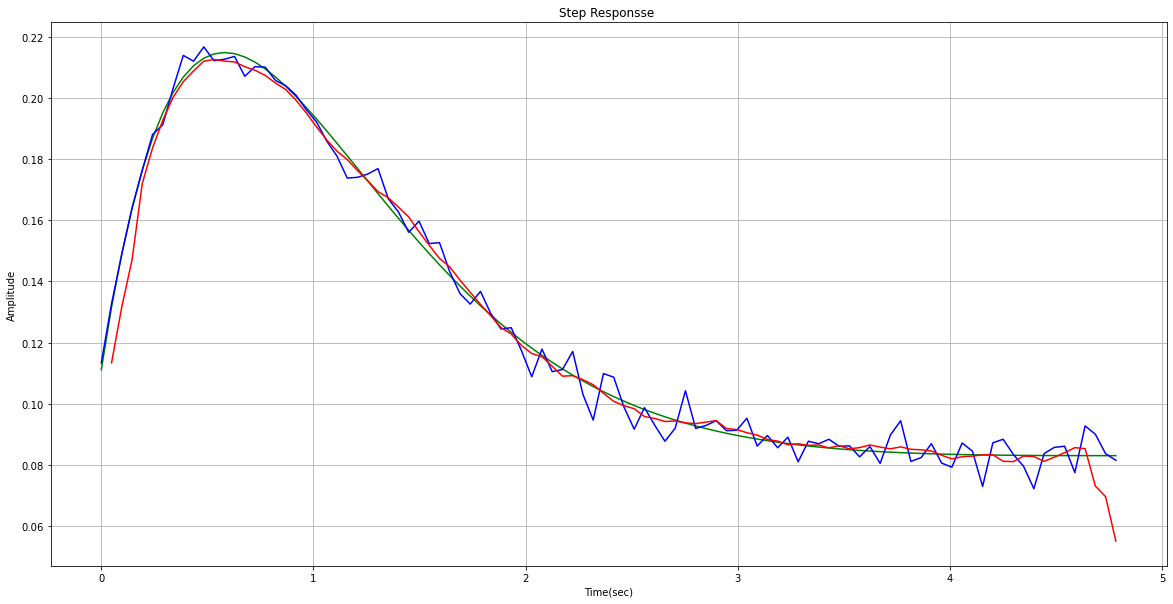

In [6]:
y_new = movingAverage(y_err, windowSize=3)

plt.figure(figsize=(20,10))
plt.plot(x,y,"g")
plt.plot(x,y_err,"b")
plt.plot(x[1:],y_new,"r")
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

## Синусоидальная функция

### Определение входного воздействия (синус) и его зашумление

In [7]:
x = np.arange(0, 1, 0.005)
y = [math.sin(10 * math.pi * i) for i in x]
y_err = y + np.random.normal(scale=0.1, size=len(y))

### Результат работы фильтра на синусоидальной функции с окном = 3
- зеленая линия - идеальный вход
- синяя линия - зашумленный вход
- красная линия - результат сглаживания

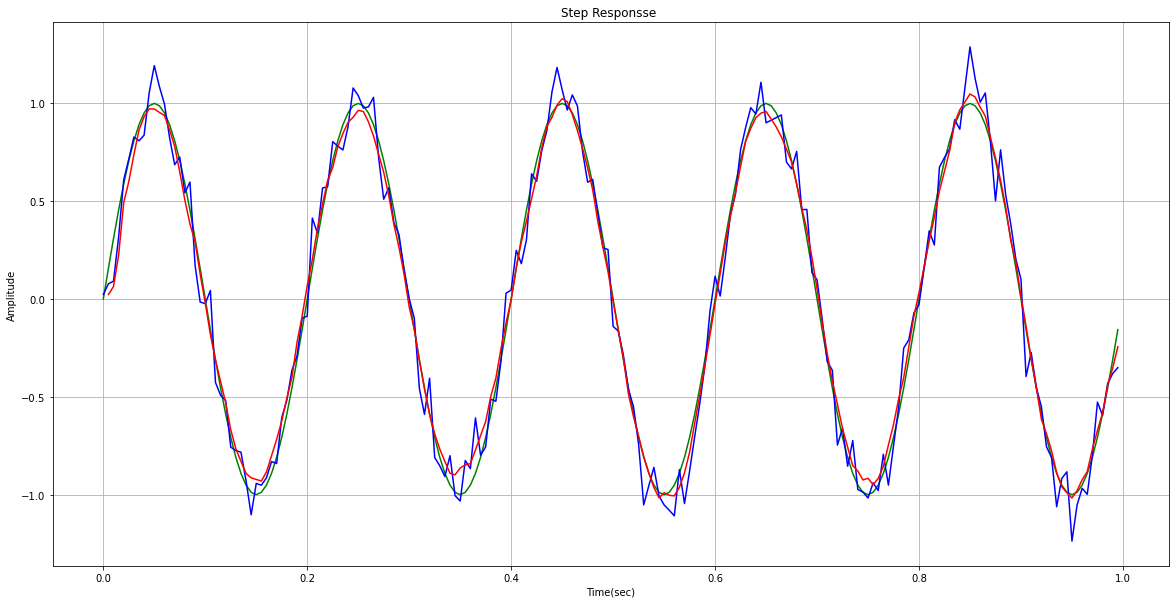

In [8]:
y_new = movingAverage(y_err, windowSize=3)

plt.figure(figsize=(20,10))
plt.plot(x,y,"g")
plt.plot(x,y_err,"b")
plt.plot(x[1:],y_new,"r")
plt.title('Step Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()